<a href="https://colab.research.google.com/github/j0k3rD/Artificial-Intelligence/blob/main/tp5_computer_vision_aaron_moya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='lightblue'>Computer Vision</font>

En este notebook veremos como implementar una arquitectura de red para procesar imágenes y que aprenda a obtener patrones (pixeles) que le sirvan para hacer una clasificación.

Usaremos el dataset [Food101](https://www.kaggle.com/datasets/dansbecker/food-101) para distintas tareas. Espero que no les de hambre xd.

Veremos:
1. Clasificación binaria (sigmoid).
2. Clasificación multi-clase (softmax/argmax).
3. Transfer Learning.

## 1. Clasificación binaria de imágenes

Primero cargamos el dataset que contiene solo imágenes de pizzas y steaks(carne) para entrenar una red neuronal convolucional para clasificación binaria.



### Cargamos el dataset

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-10-09 12:36:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.251.175.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.3MB/s    in 4.8s    

2023-10-09 12:36:52 (21.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!nvidia-smi

Mon Oct  9 12:36:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
## Extraemos del archivo zip las carpetas
import zipfile
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

>**Nota:** La estructura de carpetas bajo el nombre de train o test y luego bajo el nombre de pizza o steak en cada caso, es el tipo de estructura que necesita `TensorFlow` para saber cual es la carpeta de entrenamiento y testeo, y cual es la clase (etiqueta) de cada grupo de imagen. Con esta clase que encuentra en el nombre de la carpeta es la que va a utilizar para entrenarse.

[!] Esta libreria lo que nos permite es poder ordenar nuestro dataset en diferentes carpetas como test y train, bien ordenadas.
https://pypi.org/project/split-folders/

In [ ]:
import os
os.listdir('pizza_steak/test/pizza')

['242976.jpg',
 '1925494.jpg',
 '1594097.jpg',
 '296426.jpg',
 '212995.jpg',
 '1220156.jpg',
 '1512557.jpg',
 '2236338.jpg',
 '420409.jpg',
 '1032754.jpg',
 '2320458.jpg',
 '2406842.jpg',
 '614236.jpg',
 '3456604.jpg',
 '331644.jpg',
 '2003290.jpg',
 '3497151.jpg',
 '1687143.jpg',
 '121960.jpg',
 '398812.jpg',
 '447914.jpg',
 '1986128.jpg',
 '3612981.jpg',
 '1202689.jpg',
 '1183595.jpg',
 '293433.jpg',
 '2478221.jpg',
 '129666.jpg',
 '328965.jpg',
 '309892.jpg',
 '1694874.jpg',
 '3430418.jpg',
 '1280320.jpg',
 '2343304.jpg',
 '540882.jpg',
 '2549661.jpg',
 '2195935.jpg',
 '537575.jpg',
 '2583389.jpg',
 '3442426.jpg',
 '3296507.jpg',
 '3261551.jpg',
 '3770514.jpg',
 '2944567.jpg',
 '1983369.jpg',
 '573054.jpg',
 '144631.jpg',
 '2398925.jpg',
 '2203687.jpg',
 '729262.jpg',
 '522543.jpg',
 '1275885.jpg',
 '1180001.jpg',
 '2111981.jpg',
 '3785667.jpg',
 '138961.jpg',
 '1265335.jpg',
 '2082495.jpg',
 '2901001.jpg',
 '2871261.jpg',
 '1315645.jpg',
 '80750.jpg',
 '2782998.jpg',
 '724290.jpg',

In [ ]:
# Exploramos las carpetas un poco...
import os

# os.walk nos devuleve directorios raices, subarchivos, etc.
for dir, dirname, files in os.walk('pizza_steak'):
  print(f"Dir: {dir} | subdir: {dirname} | cant de imagenes: {len(files)} ")

Dir: pizza_steak | subdir: ['test', 'train'] | cant de imagenes: 0 
Dir: pizza_steak/test | subdir: ['pizza', 'steak'] | cant de imagenes: 0 
Dir: pizza_steak/test/pizza | subdir: [] | cant de imagenes: 250 
Dir: pizza_steak/test/steak | subdir: [] | cant de imagenes: 250 
Dir: pizza_steak/train | subdir: ['pizza', 'steak'] | cant de imagenes: 0 
Dir: pizza_steak/train/pizza | subdir: [] | cant de imagenes: 750 
Dir: pizza_steak/train/steak | subdir: [] | cant de imagenes: 750 


Vemos que la carpeta `train` contiene 750 imágenes de pizza y 750 de steak.

La carpeta `test` contiene 250 imágenes de pizza y 250 imágenes de steak.

In [ ]:
#Guardamos el nombre de las carpetas que haya dentro de train en una lista
# se puede hacer a mano pero a veces son muchas y podemos cometer errores.

classes = [f for f in os.listdir('pizza_steak/train/')]
print(classes)

['pizza', 'steak']


### Visualizamos algunos ejemplos del dataset

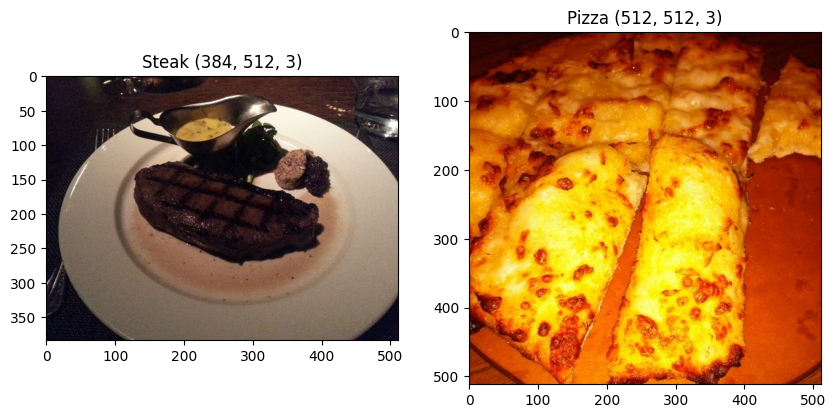

In [ ]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(10,7))
id = random.choice(range(0,749))
plt.subplot(1,2,1)
img_name = [f for f in os.listdir('pizza_steak/train/steak/')][id]
img = plt.imread('pizza_steak/train/steak/'+img_name)
plt.imshow(img)
plt.title('Steak '+str(img.shape))
plt.subplot(1,2,2)
img_name = [f for f in os.listdir('pizza_steak/train/pizza/')][id]
img = plt.imread('pizza_steak/train/pizza/'+img_name)
plt.imshow(img)
plt.title('Pizza '+str(img.shape));

In [ ]:
#Exploramos los características de las imágenes
lista_img_pizza = [f for f in os.listdir('pizza_steak/train/pizza/')]
imagen_prueba = plt.imread('pizza_steak/train/pizza/'+lista_img_pizza[23]) #Elegimos la primera de las imágenes de la lista para leerlas
print(f"Shape de la imagen: {imagen_prueba.shape}")
print(f"Dimensiones de la imagen: {imagen_prueba.ndim}")
print(f"Codificación la imagen: {imagen_prueba.dtype}")
print(f"Pixel de mayor valor: {imagen_prueba.max()}")
print(f"Pixel de menor valor: {imagen_prueba.min()}")

Shape de la imagen: (512, 507, 3)
Dimensiones de la imagen: 3
Codificación la imagen: uint8
Pixel de mayor valor: 255
Pixel de menor valor: 0


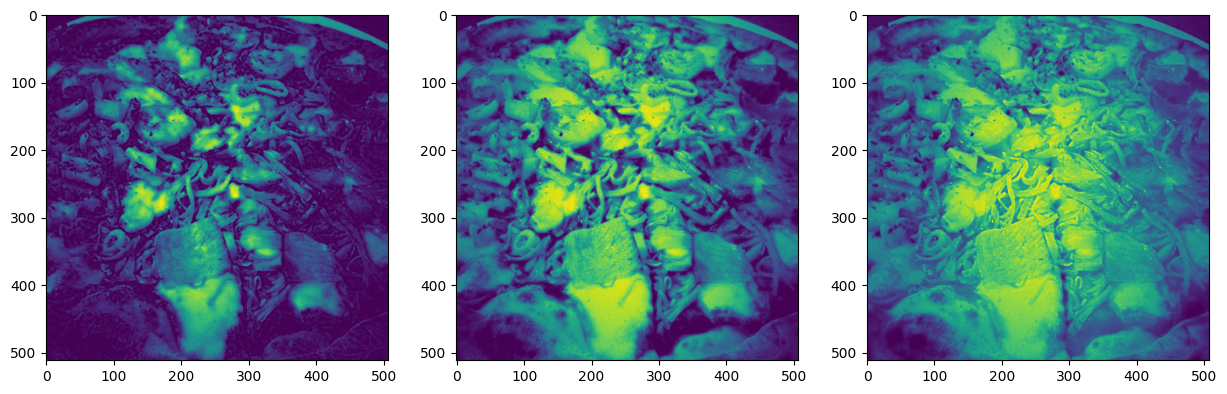

In [ ]:
import cv2
imagen_prueba = cv2.imread('pizza_steak/train/pizza/'+lista_img_pizza[23])
b,g,r =  cv2.split(imagen_prueba)
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.imshow(b,cmap=None)
plt.subplot(1,3,2)
plt.imshow(g,cmap=None)
plt.subplot(1,3,3)
plt.imshow(r,cmap=None);

Observacion: descompone la imagen para tener mas parametros para analizar.

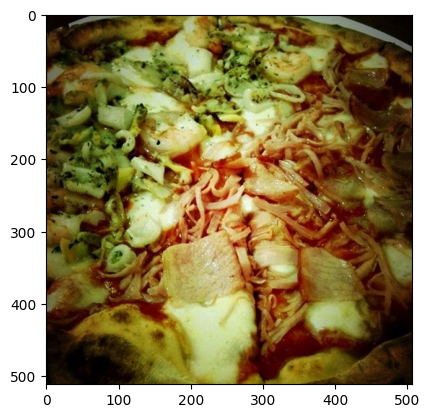

In [ ]:
imagen_reconstruida = cv2.merge([r,g,b])
plt.imshow(imagen_reconstruida);

### Creamos la arquitectura de una red neuronal convolucional
Vamos a construir una red neuronal convolucional para encontrar patrones en nuestras imágenes, más específicamente, necesitamos una forma de:
* Cargar la imágenes con TensorFlow
* Preprocesar las imágenes para escalarlas.
* Construir la red convolucional para clasificación
* Compilar la CNN
* Entrenar la CNN con los datos de entrenamiento.

In [ ]:
# Primero instanciamos el generador de dataset
# Este lo que hace es permitirnos preprocesar las imagenes (rescalarlas y aplicarles tecnicas de data augmentation)
import tensorflow as tf
tf.random.set_seed(42) #usamos este seed para que cada vez que ejecutemos la celda nos repetira los mismos valores, se usa mucho cuando queremos replicar experimentos

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'


train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, # Se normalizan los pixeles para no trabajar con datos flotantes
                                                                  horizontal_flip=True, # Giro los datos y genero nuevos datos. DATA AUGMENTATION. No se aplica al test.
                                                                  vertical_flip=True)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_batch = train_generator.flow_from_directory(train_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='binary') #multiclass -> 'categorical' [001,100,010] Toma las imagenes y las asocia a un numero. Genera etiquetas en binario (0,1). Si hacemos una red para perro, gato, oso, se usa un categorical.
test_batch = test_generator.flow_from_directory(test_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='binary')


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
imagenes, etiquetas = train_batch[0]
print(len(imagenes),len(etiquetas))

32 32


In [ ]:
classes

['pizza', 'steak']

In [ ]:
etiquetas # La primera imagen asociada a la etiqueta es un stick.

array([1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
      dtype=float32)

In [ ]:
import tensorflow as tf
#Creamos la red convolucional

model_0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=((224,224,3))),
    tf.keras.layers.Flatten(), # Vectorizar ese arreglo de alto por ancho.
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 256)               38535424  
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 38634241 (147.38 MB)
Trainable params: 38634241 (147.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Observamos que la cantidad de parámetros en una red fully connected, con solo capas profundas para entrenar con imágenes, resulta muy grande. Y con esto crece la necesidad de poder de computo a la vez que la red tiene que aprender pixel a pixel, lo cual lleva mucho más tiempo.

Una solución a esto es incorporar capas de filtrado, que filtren solo aquella información de la imagen que la red "crea" que es importante. Con esto la cantidad de parámetros se reduce a solo los parametros de dichos filtros, que resultan en menor cantidad y tiempo de procesamiento.

In [ ]:
#Creamos la red convolucional

model_0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=([224,224,3])),
    tf.keras.layers.Conv2D(5, kernel_size=(3,3), activation='relu'), #Conv -> Maxpooling -> Conv -> Maxpooling -> Flatten(vectorización) -> DNN
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(5, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout((0.20)),
    tf.keras.layers.Conv2D(5, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Flatten(), # Se vectoriza
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_0.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 5)       140       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 5)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 5)       230       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 5)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 5)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 5)        

In [ ]:
## Compilamos el modelo
model_0.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
## Entrenamos el modelo
model_0.fit(train_batch, # Trae la tupla de xtrain e ytrain
            epochs=100,
            validation_data = test_batch, # (xtest, ytest) (imagene, etiquetas)
            callbacks = [tf.keras.callbacks.ModelCheckpoint('checkpoints/model_0',save_best_only=True), #Solamente deja lo que mejores metricas le dio.
                         tf.keras.callbacks.TensorBoard('logs/model_0'), # Podemos visualizar las metricas de una forma mejor
                         tf.keras.callbacks.EarlyStopping(patience=10)]) # Corta el entrenamiento cuando no hay variacion de mejora entre epocas. El patience me dice si se clavo en la epoca 10 a 20 se termina el entrenamiento.

Epoch 1/100
47/47 [==============================] - 20s 155ms/step - loss: 0.6225 - accuracy: 0.6507 - precision: 0.6823 - recall: 0.5640 - val_loss: 0.5292 - val_accuracy: 0.7480 - val_precision: 0.7768 - val_recall: 0.6960
Epoch 2/100
47/47 [==============================] - 7s 158ms/step - loss: 0.5558 - accuracy: 0.7193 - precision: 0.7489 - recall: 0.6600 - val_loss: 0.5062 - val_accuracy: 0.7580 - val_precision: 0.8564 - val_recall: 0.6200
Epoch 3/100
47/47 [==============================] - 7s 145ms/step - loss: 0.5335 - accuracy: 0.7413 - precision: 0.7919 - recall: 0.6547 - val_loss: 0.4856 - val_accuracy: 0.7520 - val_precision: 0.7739 - val_recall: 0.7120
Epoch 4/100
47/47 [==============================] - 6s 135ms/step - loss: 0.5284 - accuracy: 0.7460 - precision: 0.7750 - recall: 0.6933 - val_loss: 0.4852 - val_accuracy: 0.7860 - val_precision: 0.7849 - val_recall: 0.7880
Epoch 5/100
47/47 [==============================] - 6s 137ms/step - loss: 0.5248 - accuracy: 0.740

### Evaluamos el modelo

Para esto vamos a importarlo de la carpeta donde se guardaron los checkpoints.

In [ ]:
model_0 = tf.keras.models.load_model('/content/checkpoints/model_0')

In [ ]:
model_0.evaluate(test_batch)

16/16 [==============================] - 1s 75ms/step - loss: 0.3017 - accuracy: 0.8680 - precision: 0.8710 - recall: 0.8640


[0.30167534947395325,
 0.8679999709129333,
 0.8709677457809448,
 0.8640000224113464]

In [ ]:
# Podemos ver las métricas con TensorBoard que guardamos durante el entrenamiento
!tensorboard dev upload --logdir=logs/model_0  #tensorboard --logdir=

2023-10-02 23:35:50.624053: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs/model_0

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   ZXJ-KSC-LBH

ZXJ-KSC-LBH
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

### Hacemos una predicción

In [ ]:
# Elegimos una imagen de dataset a gusto
img = plt.imread('/content/pizza_steak/test/pizza/1180273.jpg')

#Rescalamos la imagen para introducirla al modelo
img = img/255.
# Tensorflow usa float16 / float32

#Ajustamos la imagen a 224,224,3

img.resize((224,224,3))
img_expanded = tf.expand_dims(img, axis=0) # TensorFlow (None, 224, 224 ,3) np.expand_dims(img,axis=0)

y_pred = model_0.predict(img_expanded)
print(y_pred)

KeyboardInterrupt: ignored

In [ ]:
# A la salida del modelo le quitamos la dimensión extra que tiene y redondeamos el valor a la clase más cercana (en este caso 0)
y_pred = tf.squeeze(y_pred) # Eliminar dimensiones vacias [[0.005]] -> [0.005]
y_pred = tf.round(y_pred)
print(f"La predicción para la imagen de pizza es: {y_pred} ")

In [ ]:
classes

# Ejercicio 1

### 🛠️ Ajustamos los hiperparametros para mejorar las métricas del modelo con el set de testeo 🤓

Acá podemos probar de cambiar algunos hiperparámetros:
1. La cantidad de filtros de las capas convolucionales pueden ir creciendo (16, 32,64)
2. El tamaño del kernel de los filtros también puede crecer 7x7, 9x7, 11x11.
3. Podemos implementar data augmentation.
4. Podemos usar dropout en la red profunda.
5. Podemos cambiar el learning rate.

In [ ]:
import tensorflow as tf

tf.random.set_seed(42) #usamos este seed para que cada vez que ejecutemos la celda nos repetira los mismos valores, se usa mucho cuando queremos replicar experimentos

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# Definición de generadores de datos. Agregamos mas parametros para mejorar los resultados
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,      #Variar la orientacion de la imagen
    width_shift_range=0.2,  #Desplazamiento horizontal de las imagenes
    height_shift_range=0.2, #Desplazamiento vertical
    shear_range=0.2,        #Distorcion
    zoom_range=0.2          #Zoom + o -
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64, # Se agrandó el tamaño de la muestra
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

# Creación del modelo CNN
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=([224,224,3])),
    tf.keras.layers.Conv2D(64, (11, 11), activation='relu'), # Se agrandó la cantidad de capas y el tamaño del kernel de los filtros.
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (11, 11), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (11, 11), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilamos el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('checkpoints/model', save_best_only=True),
    tf.keras.callbacks.TensorBoard('logs/model'),
    tf.keras.callbacks.EarlyStopping(patience=10),
]

# Entrenamiento del modelo
history = model.fit(train_generator,
                    epochs=100, # Se aumentó el número de épocas
                    validation_data=test_generator,
                    callbacks=callbacks)  # Agregamos los callbacks aquí

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/100
24/24 [==============================] - 117s 4s/step - loss: 0.6839 - accuracy: 0.5553 - precision_10: 0.5551 - recall_10: 0.5573 - val_loss: 0.6421 - val_accuracy: 0.6440 - val_precision_10: 0.8830 - val_recall_10: 0.3320
Epoch 2/100
24/24 [==============================] - 33s 1s/step - loss: 0.6378 - accuracy: 0.6447 - precision_10: 0.6747 - recall_10: 0.5587 - val_loss: 0.5525 - val_accuracy: 0.7600 - val_precision_10: 0.7802 - val_recall_10: 0.7240
Epoch 3/100
24/24 [==============================] - 38s 2s/step - loss: 0.5802 - accuracy: 0.6867 - precision_10: 0.7310 - recall_10: 0.5907 - val_loss: 0.5233 - val_accuracy: 0.7480 - val_precision_10: 0.6824 - val_recall_10: 0.9280
Epoch 4/100
24/24 [==============================] - 29s 1s/step - loss: 0.5719 - accuracy: 0.6973 - precision_10: 0.7096 - recall_10: 0.6680 - val_loss: 0.4627 - val_accuracy: 0.8000 - val_precision_10: 0.9121 

In [ ]:
model = tf.keras.models.load_model('/content/checkpoints/model')

In [ ]:
model.evaluate(test_generator)

8/8 [==============================] - 3s 401ms/step - loss: 0.1360 - accuracy: 0.9480 - precision_10: 0.9480 - recall_10: 0.9480


[0.13602475821971893,
 0.9480000138282776,
 0.9480000138282776,
 0.9480000138282776]

In [ ]:
# A la salida del modelo le quitamos la dimensión extra que tiene y redondeamos el valor a la clase más cercana (en este caso 0)
y_pred = tf.squeeze(y_pred) # Eliminar dimensiones vacias [[0.005]] -> [0.005]
y_pred = tf.round(y_pred)
print(f"La predicción para la imagen de pizza es: {y_pred} ")

La predicción para la imagen de pizza es: 0.0 


*Observaciones*:

1. **Precisión y recall**: el nuevo modelo tiene una precisión más alta (0.948) en comparación al anterior (0.885), lo que significa que tiene menos falsos positivos. Sin embargo, el este nuevo tiene un recall ligeramente menor (0.948) en comparación con el otro (0.868), lo que indica que puede perder algunos casos positivos verdaderos.

2. **Exactitud (Accuracy)**: el nuevo modelo tiene una mayor exactitud (0.948) en comparación con el modelo de la clase (0.878), lo que indica que clasifica correctamente una mayor proporción de ejemplos en el conjunto de prueba.

3. **Pérdida (Loss)**: el nuevo tiene un loss más bajo (0.136) que el modelo de la clase (0.284), lo que indica que está haciendo un mejor trabajo en la minimización de la función de pérdida durante el entrenamiento.

Algo interesante también es que este entrenamiento tardó bastante más, lo cual está bien ya que se usaron una mayor cantidad de épocas, el aumento de datos también fue de un rango mayor y el tamaño de los lotes usados pasaron de 32 a 64, el doble.



---



## 2. Clasificación multiclase de imágenes

Para este ejercicio tomaremos 10 comidas del mismo dataset original.

Lo importamos en formato zip, por lo que despues lo descomprimimos usando `zipfile`.

Para este ejercicio deberán seguir los siguientes pasos:
1. Convertirse uno con los datos. Es decir, exploren a fondo el dataset para tener un entendimiento total.
2. Preprocesar los datos.
3. Crear un modelo.
4. Compilar el modelo
5. Entrenar el modelo.
6. Evaluar el modelo.
7. Ajustar diferentes hiperparámetros y mejorar el modelo (intentar superar las metricas que ya se tienen y reducir el sobreajuste).
8. Repetir los pasos hasta que las metricas sean las deseadas.

### Cargamos el dataset

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-10-16 02:36:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  42.7MB/s    in 6.6s    

2023-10-16 02:36:37 (75.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
## Extraemos del archivo zip las carpetas
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Exploramos las carpetas...
import os
for dir, dirname, files in os.walk('10_food_classes_all_data'):
  print(f"Dir: {dir} | subdir: {dirname} | cant de imagenes: {len(files)} ")

Dir: 10_food_classes_all_data | subdir: ['train', 'test'] | cant de imagenes: 0 
Dir: 10_food_classes_all_data/train | subdir: ['ramen', 'ice_cream', 'pizza', 'chicken_wings', 'grilled_salmon', 'fried_rice', 'steak', 'hamburger', 'chicken_curry', 'sushi'] | cant de imagenes: 0 
Dir: 10_food_classes_all_data/train/ramen | subdir: [] | cant de imagenes: 750 
Dir: 10_food_classes_all_data/train/ice_cream | subdir: [] | cant de imagenes: 750 
Dir: 10_food_classes_all_data/train/pizza | subdir: [] | cant de imagenes: 750 
Dir: 10_food_classes_all_data/train/chicken_wings | subdir: [] | cant de imagenes: 750 
Dir: 10_food_classes_all_data/train/grilled_salmon | subdir: [] | cant de imagenes: 750 
Dir: 10_food_classes_all_data/train/fried_rice | subdir: [] | cant de imagenes: 750 
Dir: 10_food_classes_all_data/train/steak | subdir: [] | cant de imagenes: 750 
Dir: 10_food_classes_all_data/train/hamburger | subdir: [] | cant de imagenes: 750 
Dir: 10_food_classes_all_data/train/chicken_curry |

Vemos que la carpeta `train` contiene 750 imágenes de cada clase: ['sushi', 'chicken_wings', 'chicken_curry', 'pizza', 'hamburger', 'grilled_salmon', 'fried_rice', 'steak', 'ice_cream', 'ramen']

La carpeta `test` contiene 250 imágenes de cada clase: ['sushi', 'chicken_wings', 'chicken_curry', 'pizza', 'hamburger', 'grilled_salmon', 'fried_rice', 'steak', 'ice_cream', 'ramen']

RELACION RECOMENDADA ENTRE LAS DOS CARPETAS: del dataset podemos tomar el 75% train y el resto para test.
Cuando tenemos muchisimos datos se dividen en 0.9 y 0.1.

In [ ]:
classes = [f for f in os.listdir('10_food_classes_all_data/train')]
print(classes)

['ramen', 'ice_cream', 'pizza', 'chicken_wings', 'grilled_salmon', 'fried_rice', 'steak', 'hamburger', 'chicken_curry', 'sushi']


### Visualizamos algunos ejemplos del dataset

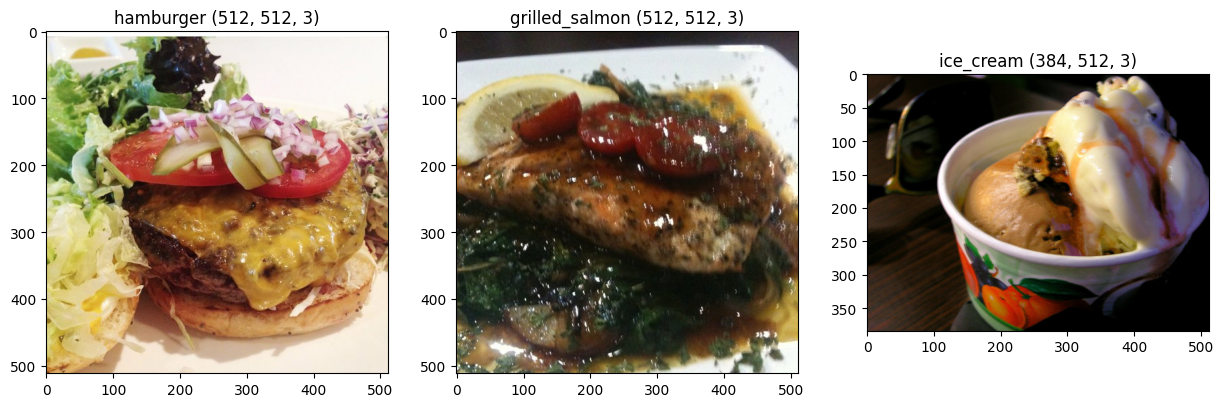

In [ ]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(15,7))
id = random.choice(range(0,749))
plt.subplot(1,3,1)
img_name = [f for f in os.listdir('10_food_classes_all_data/train/hamburger')][id]
img = plt.imread('10_food_classes_all_data/train/hamburger/'+img_name)
plt.imshow(img)
plt.title('hamburger '+str(img.shape))
plt.subplot(1,3,2)
img_name = [f for f in os.listdir('10_food_classes_all_data/train/grilled_salmon/')][id]
img = plt.imread('10_food_classes_all_data/train/grilled_salmon/'+img_name)
plt.imshow(img)
plt.title('grilled_salmon '+str(img.shape))
plt.subplot(1,3,3)
img_name = [f for f in os.listdir('10_food_classes_all_data/train/ice_cream/')][id]
img = plt.imread('10_food_classes_all_data/train/ice_cream/'+img_name)
plt.imshow(img)
plt.title('ice_cream '+str(img.shape));

In [ ]:
#Exploramos los características de las imágenes
lista_img_pizza = [f for f in os.listdir('10_food_classes_all_data/train/hamburger/')]
imagen_prueba = plt.imread('10_food_classes_all_data/train/hamburger/'+random.choice(lista_img_pizza)) #Elegimos la primera de las imágenes de la lista para leerlas
print(f"Shape de la imagen: {imagen_prueba.shape}")
print(f"Dimensiones de la imagen: {imagen_prueba.ndim}")
print(f"Codificación la imagen: {imagen_prueba.dtype}")
print(f"Pixel de mayor valor: {imagen_prueba.max()}")
print(f"Pixel de menor valor: {imagen_prueba.min()}")

Shape de la imagen: (512, 512, 3)
Dimensiones de la imagen: 3
Codificación la imagen: uint8
Pixel de mayor valor: 255
Pixel de menor valor: 0


### Creamos la arquitectura CNN para multi-clasificación

In [ ]:
import tensorflow as tf
print(f"Version: {tf.__version__}")

Version: 2.13.0


In [ ]:
tf.random.set_seed(42)

train_dir = '/content/10_food_classes_all_data/train/'
test_dir = '/content/10_food_classes_all_data/test/'

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  horizontal_flip=True)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_batch = train_generator.flow_from_directory(train_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical') #Usamos categorical para referirnos a que son más de dos clases
test_batch = test_generator.flow_from_directory(test_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical') #'sparse'

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
images, etiquetas = train_batch[0]
etiquetas [:5] #ONE HOT ENCODER

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
#Creamos la red convolucional

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=([224,224,3])),
    tf.keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 flatten (Flatten)           (None, 27040)             0

In [ ]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy'])

In [ ]:
model_1.fit(train_batch,
            epochs=200,
            validation_data = test_batch,
            callbacks = [tf.keras.callbacks.EarlyStopping(patience=10),
                         tf.keras.callbacks.ReduceLROnPlateau(patience=5)]) # Parecido al EarlyStoping
                         # Reduce Learning on Plateu = cuando baja mucho, el alfa que era el learning rate, lo baja para que pueda seguir entrenando.
                         # Usa un patience tambien, si ese patience no cambiar, afecta al lr en: new_lr = lr*0.2

Epoch 1/200
235/235 [==============================] - 41s 131ms/step - loss: 2.1453 - accuracy: 0.2257 - val_loss: 2.0551 - val_accuracy: 0.2664 - lr: 0.0010
Epoch 2/200
235/235 [==============================] - 30s 129ms/step - loss: 1.9089 - accuracy: 0.3363 - val_loss: 1.9335 - val_accuracy: 0.3208 - lr: 0.0010
Epoch 3/200
235/235 [==============================] - 32s 134ms/step - loss: 1.6904 - accuracy: 0.4220 - val_loss: 1.8765 - val_accuracy: 0.3488 - lr: 0.0010
Epoch 4/200
235/235 [==============================] - 29s 124ms/step - loss: 1.3790 - accuracy: 0.5407 - val_loss: 1.9804 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 5/200
235/235 [==============================] - 30s 126ms/step - loss: 1.0181 - accuracy: 0.6777 - val_loss: 2.1824 - val_accuracy: 0.3324 - lr: 0.0010
Epoch 6/200
235/235 [==============================] - 31s 132ms/step - loss: 0.7375 - accuracy: 0.7791 - val_loss: 2.2660 - val_accuracy: 0.3536 - lr: 0.0010
Epoch 7/200
235/235 [=========================

### Evaluamos el modelo

In [ ]:
model_1.evaluate(test_batch)

79/79 [==============================] - 6s 81ms/step - loss: 3.1646 - accuracy: 0.3572


[3.1646409034729004, 0.3571999967098236]

### Hacemos una predicción

In [ ]:
# Elegimos una imagen de dataset a gusto
img = plt.imread('/content/10_food_classes_all_data/test/fried_rice/1023430.jpg')

#Rescalamos la imagen para introducirla al modelo
img = img/255.

#Ajustamos la imagen a 224,224,3

img.resize((224,224,3))
img_expanded = tf.expand_dims(img, axis=0)

y_pred = model_1.predict(img_expanded)
print(y_pred) #Softmax

1/1 [==============================] - 0s 195ms/step
[[1.2795667e-03 3.0896732e-07 7.2294998e-01 4.3013867e-04 7.6531731e-05
  2.6517674e-01 2.5955953e-03 6.5267819e-04 5.5641500e-05 6.7827678e-03]]


In [ ]:
y_pred = tf.squeeze(y_pred)
tf.math.reduce_sum(y_pred).numpy()

0.99999994

In [ ]:
tf.argmax(y_pred).numpy()

2

In [ ]:
y_pred = tf.squeeze(y_pred)
y_pred = tf.round(y_pred)
print(f"La predicción para la imagen de pizza es: {y_pred} ") #ARGMAX

La predicción para la imagen de pizza es: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 


In [ ]:
y_pred = tf.argmax(y_pred) #argmax retorna el indice del item mayor de todos los items
print(f"La clase es: {classes[y_pred]}")

La clase es: pizza


# Ejercicio 2

### 🛠️ Ajustamos los hiperparametros para mejorar las métricas del modelo con el set de testeo 🤓

Acá podemos probar de cambiar algunos hiperparámetros:
1. La cantidad de filtros de las capas convolucionales pueden ir creciendo (16, 32,...)
2. El tamaño del kernel de los filtros también puede crecer.
3. Podemos implementar data augmentation (más tecnicas).
4. Podemos usar dropout en la red profunda.
5. Podemos cambiar el learning rate.

In [ ]:
import tensorflow as tf

# Configuración de la semilla aleatoria para reproducibilidad
tf.random.set_seed(42)

# Directorios de entrenamiento y prueba
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

# Generadores de datos de entrenamiento y prueba con normalización y aumento de datos
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    # vertical_flip=True,
    # rotation_range=30,       # Aumento de rotación
    # width_shift_range=0.2,   # Aumento de cambio de ancho
    # height_shift_range=0.2,  # Aumento de cambio de alto
    # shear_range=0.2,         # Distorción
    # zoom_range=0.2           # Aumento de zoom
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_batch = train_generator.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_batch = test_generator.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
images, etiquetas = train_batch[0]
etiquetas [:5] #ONE HOT ENCODER

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
# Creación del modelo CNN mejorado
model_improved = tf.keras.Sequential([
    tf.keras.layers.Input(shape=([224,224,3])),
    tf.keras.layers.Conv2D(20, kernel_size=(6, 6), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(20, kernel_size=(6, 6), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(20, kernel_size=(6, 6), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10, activation='softmax')  # Clasificación multiclase
])

# Resumen
model_improved.summary()

In [ ]:
# Compilación del modelo
model_improved.compile(
    optimizer=tf.keras.optimizers.Adam(), #learning_rate=0.0001
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
# Entrenamiento del modelo
model_improved.fit(
    train_batch,
    epochs=200,
    validation_data=test_batch,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(patience=5)
    ]
)

# Evaluación del modelo en el conjunto de prueba
test_accuracy = model_improved.evaluate(test_batch)

Epoch 1/200
235/235 [==============================] - 33s 128ms/step - loss: 2.1717 - accuracy: 0.1905 - val_loss: 2.0022 - val_accuracy: 0.2988 - lr: 1.0000e-04
Epoch 2/200
235/235 [==============================] - 31s 130ms/step - loss: 2.0099 - accuracy: 0.2880 - val_loss: 1.9002 - val_accuracy: 0.3564 - lr: 1.0000e-04
Epoch 3/200
235/235 [==============================] - 31s 132ms/step - loss: 1.9272 - accuracy: 0.3264 - val_loss: 1.8576 - val_accuracy: 0.3488 - lr: 1.0000e-04
Epoch 4/200
235/235 [==============================] - 31s 132ms/step - loss: 1.8382 - accuracy: 0.3640 - val_loss: 1.7792 - val_accuracy: 0.3824 - lr: 1.0000e-04
Epoch 5/200
235/235 [==============================] - 32s 134ms/step - loss: 1.7787 - accuracy: 0.3873 - val_loss: 1.7450 - val_accuracy: 0.3944 - lr: 1.0000e-04
Epoch 6/200
235/235 [==============================] - 31s 130ms/step - loss: 1.6906 - accuracy: 0.4213 - val_loss: 1.7258 - val_accuracy: 0.4012 - lr: 1.0000e-04
Epoch 7/200
235/235 [=

*Observaciones*:

Consideraciones técnicas:

Se llevaron a cabo múltiples iteraciones de entrenamiento con el modelo, en un intento de mejorar su desempeño. Se exploraron diversas estrategias de ajuste de parámetros, que incluyeron el aumento del tamaño del conjunto de datos mediante la incorporación de imágenes adicionales, la implementación de técnicas de aumento de datos, la reducción del porcentaje de dropout del 50% al 20% y el incremento del valor del learning_rate a 0.0001. En términos generales, estas modificaciones revelaron un claro fenómeno de sobreajuste en el Modelo Mejorado, así como otros problemas identificados a continuación:

1. **Sobreajuste**: El Modelo Mejorado exhibe un marcado sobreajuste, evidenciado por la amplia brecha entre la precisión en el conjunto de entrenamiento y la precisión en el conjunto de validación. En contraste, el Modelo de Clase muestra una brecha más reducida, lo que sugiere una mejor capacidad de generalización.

2. **Pérdida (Loss)**: La pérdida en el conjunto de validación es sustancialmente mayor en el Modelo Mejorado (Modelo 2), lo que indica dificultades en la capacidad del modelo para realizar predicciones precisas en datos no vistos.

3. **Arquitectura de la CNN**: Se observan diferencias significativas en la arquitectura de la red entre los dos modelos, lo que parece influir en el rendimiento. La elección de un kernel de 6x6 y 20 filtros en el Modelo Mejorado podría considerarse excesivamente agresiva y compleja. Se llevaron a cabo entrenamientos adicionales con un mayor número de filtros (64) y un tamaño de kernel más grande (11x11), pero estos cambios no condujeron a una mejora en los resultados.



---



## 3. Transfer Learning

O también conocido cómo `fine tuning` es el método por el cual instanciamos una red neuronal convolucional previamente entrenada para otra tarea, pero sus filtros de más bajo nivel sirven para muchos propositos.

Nosotros tomamos esa CNN y re-entrenamos sus capas de más alto nivel para el objetivo que queremos lograr (por ejemplo clasificar comida en imágenes).

Para esto `keras` ya tiene implementado varios arquitecturas pre-entrenadas, las más conocidas son:

* AlexNet
* VGG 16
* VGG 19
* Inception
* ResNet
* EfficientNet


In [ ]:
base_model = tf.keras.applications.VGG19(include_top=False, #sin la parte dnn
                                         weights='imagenet') #EfficienteNetB0
base_model.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer_num, layers in enumerate(base_model.layers):
  print(layer_num, layers)

0 <keras.src.engine.input_layer.InputLayer object at 0x7a26b7fdd060>
1 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a26972fbfd0>
2 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a269f359b10>
3 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7a26977fb5b0>
4 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a2694ebc850>
5 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a2694ebc190>
6 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7a26972f9f00>
7 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a2697aec100>
8 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a2695242b30>
9 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a26755f8e50>
10 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a26755fb760>
11 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7a26755fabf0>
12 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7a26755fbe50>
13 <keras.src.layer

In [ ]:
#Creamos la red convolucional

model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=([224,224,3])),
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 26449738 (100.90 MB)
Trainable params: 6425354 (24.51 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
model_2.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy'])
model_2.fit(train_batch,
            epochs=200,
            validation_data = test_batch,
            callbacks = [tf.keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/200
235/235 [==============================] - 63s 233ms/step - loss: 1.8845 - accuracy: 0.4657 - val_loss: 1.1717 - val_accuracy: 0.6064
Epoch 2/200
235/235 [==============================] - 51s 217ms/step - loss: 1.0806 - accuracy: 0.6429 - val_loss: 1.2430 - val_accuracy: 0.5816
Epoch 3/200
235/235 [==============================] - 51s 216ms/step - loss: 0.8750 - accuracy: 0.7085 - val_loss: 0.9567 - val_accuracy: 0.6712
Epoch 4/200
235/235 [==============================] - 51s 216ms/step - loss: 0.7355 - accuracy: 0.7568 - val_loss: 1.0123 - val_accuracy: 0.6624
Epoch 5/200
235/235 [==============================] - 51s 216ms/step - loss: 0.6016 - accuracy: 0.7983 - val_loss: 0.9953 - val_accuracy: 0.6740
Epoch 6/200
235/235 [==============================] - 52s 220ms/step - loss: 0.4895 - accuracy: 0.8448 - val_loss: 1.0330 - val_accuracy: 0.6652
Epoch 7/200
235/235 [==============================] - 59s 252ms/step - loss: 0.4090 - accuracy: 0.8707 - val_loss: 1.0570 -

In [ ]:
model_2.evaluate(test_batch)

79/79 [==============================] - 13s 158ms/step - loss: 1.3899 - accuracy: 0.6468


[1.3898680210113525, 0.6467999815940857]

>**Nota:** Vemos que la implementación de la tecnica de `Transfer Learning` con un modelo pre-entrenado mejoro sustancialmente los valores de las métricas de evaluación.

# Ejercicio 3

### 🛠️ Ajustamos los hiperparametros para mejorar las métricas del modelo con el set de testeo 🤓

Acá podemos probar de cambiar algunos hiperparámetros:
1. Probar otras redes pre entrenadas convolucionales: ['ResNet101','EfficientNetB0','InceptionNet']

[Link](https://www.tensorflow.org/api_docs/python/tf/keras/applications)

## ResNet101

In [ ]:
import tensorflow as tf

# Cargar ResNet101 pre-entrenada
base_model = tf.keras.applications.ResNet101(include_top=False, weights='imagenet')
base_model.trainable = False

# Crear el modelo completo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_batch, epochs=200, validation_data=test_batch, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluar el modelo
model.evaluate(test_batch)

171446536/171446536 [==============================] - 1s 0us/step
Epoch 1/200
235/235 [==============================] - 71s 265ms/step - loss: 2.9116 - accuracy: 0.1040 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/200
235/235 [==============================] - 58s 248ms/step - loss: 2.3069 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/200
235/235 [==============================] - 59s 251ms/step - loss: 2.3081 - accuracy: 0.0959 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/200
235/235 [==============================] - 58s 246ms/step - loss: 2.3028 - accuracy: 0.0907 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/200
235/235 [==============================] - 58s 248ms/step - loss: 2.3028 - accuracy: 0.0961 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/200
235/235 [==============================] - 59s 250ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/200
235/235 [==============================] - 58

[2.302591562271118, 0.10000000149011612]

## EfficientNetB0

In [ ]:
import tensorflow as tf

# Cargar InceptionNet pre-entrenada
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
base_model.trainable = False

# Crear el modelo completo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_batch, epochs=200, validation_data=test_batch, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluar el modelo
model.evaluate(test_batch)


87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/200
235/235 [==============================] - 44s 157ms/step - loss: 3.2246 - accuracy: 0.6607 - val_loss: 0.9190 - val_accuracy: 0.7252
Epoch 2/200
235/235 [==============================] - 33s 141ms/step - loss: 0.8057 - accuracy: 0.7627 - val_loss: 0.6796 - val_accuracy: 0.8032
Epoch 3/200
235/235 [==============================] - 33s 140ms/step - loss: 0.6110 - accuracy: 0.8145 - val_loss: 0.8369 - val_accuracy: 0.7616
Epoch 4/200
235/235 [==============================] - 34s 145ms/step - loss: 0.4258 - accuracy: 0.8597 - val_loss: 0.6918 - val_accuracy: 0.7956
Epoch 5/200
235/235 [==============================] - 34s 144ms/step - loss: 0.3993 - accuracy: 0.8697 - val_loss: 0.6896 - val_accuracy: 0.8008
Epoch 6/200
235/235 [==============================] - 34s 144ms/step - loss: 0.2848 - accuracy: 0.9099 - val_loss: 0.7609 - val_accuracy: 0.8012
Epoch 7/200
235/235 [==============================] - 33s 

[1.0253618955612183, 0.7996000051498413]

## InceptionNet

In [ ]:
import tensorflow as tf

# Cargar InceptionNet pre-entrenada
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
base_model.trainable = False

# Crear el modelo completo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_batch, epochs=200, validation_data=test_batch, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Evaluar el modelo
model.evaluate(test_batch)


Epoch 1/200
235/235 [==============================] - 43s 161ms/step - loss: 3.8110 - accuracy: 0.6487 - val_loss: 0.8181 - val_accuracy: 0.7424
Epoch 2/200
235/235 [==============================] - 38s 163ms/step - loss: 0.7519 - accuracy: 0.7725 - val_loss: 0.7816 - val_accuracy: 0.7736
Epoch 3/200
235/235 [==============================] - 34s 145ms/step - loss: 0.5596 - accuracy: 0.8283 - val_loss: 0.7895 - val_accuracy: 0.7836
Epoch 4/200
235/235 [==============================] - 38s 160ms/step - loss: 0.4741 - accuracy: 0.8459 - val_loss: 0.7181 - val_accuracy: 0.7888
Epoch 5/200
235/235 [==============================] - 33s 141ms/step - loss: 0.3489 - accuracy: 0.8900 - val_loss: 0.7312 - val_accuracy: 0.8048
Epoch 6/200
235/235 [==============================] - 33s 140ms/step - loss: 0.3325 - accuracy: 0.8899 - val_loss: 0.7769 - val_accuracy: 0.7960
Epoch 7/200
235/235 [==============================] - 33s 142ms/step - loss: 0.2737 - accuracy: 0.9077 - val_loss: 0.8379 -

[1.0877459049224854, 0.7940000295639038]

*Observaciones*:

- **VGG19**: Después de 13 épocas de entrenamiento, se logra una alta precisión en el conjunto de entrenamiento, alcanzando un 96.11%.
Sin embargo, en el conjunto de validación, la precisión es significativamente más baja, con un 64.68%. Esto podría indicar un posible sobreajuste del modelo a los datos de entrenamiento.

- **ResNet101**:Este modelo muestra un rendimiento bastante pobre. Después de 17 épocas, tanto en el conjunto de entrenamiento como en el conjunto de validación, la precisión es muy baja, alrededor del 10%. Esto muestra que el modelo no está aprendiendo adecuadamente los patrones en los datos o que hay algún problema en la configuración del modelo.

- **EfficientNetB0**(de los mejores): En este caso vemos un rendimiento sólido. Después de 12 épocas de entrenamiento alcanza una alta precisión en el conjunto de entrenamiento llegando al 96.05%.
En el conjunto de validación, la precisión es notablemente mejor que en VGG19 y ResNet101, con un 79.96%. Esto indica que el modelo generaliza mejor a datos no vistos en comparación con lo otros.

- **InceptionNet**(de los mejores): Como en el caso del modelo EfficientNetB0, el modelo InceptionNet logra un buen rendimiento después de 14 épocas de entrenamiento, con una precisión del 95.96% en el conjunto de entrenamiento.
En el conjunto de validación, también muestra una alta precisión, alcanzando un 79.40%, lo que indica que el modelo generaliza bien a datos de validación.